In [2]:
import sys

!{sys.executable} -m pip install keras==2.13.1


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [11]:
!pip3 install --force-reinstall imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.9 MB/s eta 0:00:00a 0:00:01
  Using cached numpy-1.26.2-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
  Using cached scikit_learn-1.3.2-cp310-cp310-macosx_12_0_arm64.whl (9.5 MB)
  Using cached scipy-1.11.4-cp310-cp310-macosx_12_0_arm64.whl (29.8 MB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.2.0
    Uninstalling threadpoolctl-3.2.0:
      Successfully uninstalled threadpoolctl-3.2.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling

In [1]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, ConfusionMatrixDisplay, classification_report

import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

import plotly.graph_objs as go
from plotly.subplots import make_subplots

path = "../../"
# from sys import platform
# if platform == "linux" or platform == "linux2":
#     # linux
#     path='/home/vedant/projects/'
# elif platform == "darwin":
#     # OS X
#     path='/Users/vedant/Desktop/Programming/'

## Loading feature file
(ignoring vggish features for this)

In [3]:
cols=['video_id', 'start_time', 'mid_ts', 'label', 'average_zcr',
       'zcr_stddev', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean',
       'mfcc4_mean', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean',
       'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean',
       'mfcc13_mean', 'mfcc1_std', 'mfcc2_std', 'mfcc3_std', 'mfcc4_std',
       'mfcc5_std', 'mfcc6_std', 'mfcc7_std', 'mfcc8_std', 'mfcc9_std',
       'mfcc10_std', 'mfcc11_std', 'mfcc12_std', 'mfcc13_std',
       'delta_mfcc1_mean', 'delta_mfcc2_mean', 'delta_mfcc3_mean',
       'delta_mfcc4_mean', 'delta_mfcc5_mean', 'delta_mfcc6_mean',
       'delta_mfcc7_mean', 'delta_mfcc8_mean', 'delta_mfcc9_mean',
       'delta_mfcc10_mean', 'delta_mfcc11_mean', 'delta_mfcc12_mean',
       'delta_mfcc13_mean', 'delta_mfcc1_std', 'delta_mfcc2_std',
       'delta_mfcc3_std', 'delta_mfcc4_std', 'delta_mfcc5_std',
       'delta_mfcc6_std', 'delta_mfcc7_std', 'delta_mfcc8_std',
       'delta_mfcc9_std', 'delta_mfcc10_std', 'delta_mfcc11_std',
       'delta_mfcc12_std', 'delta_mfcc13_std',
       'centroid_mean','centroid_std',
       'contrast_mean','contrast_std',
       'flatness_mean','flatness_std',
       'rolloff_mean','rolloff_std','rms_mean','rms_std','vggish']

d=np.load('../resources/working_data/vocal_only_features.npy',allow_pickle=True)
df = pd.DataFrame(d,columns=cols)

lut = pd.read_csv('../resources/dataset/lookup.csv')

df.drop('vggish',axis=1,inplace=True)
df


,video_id,start_time,mid_ts,label,average_zcr,zcr_stddev,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,...,centroid_mean,centroid_std,contrast_mean,contrast_std,flatness_mean,flatness_std,rolloff_mean,rolloff_std,rms_mean,rms_std
0,K5pMoSECagE,0.0,0.5,no_vocals,0.056461,0.016519,-913.838562,84.372003,28.775082,14.846349,...,4690.692009,1596.813609,14.685556,5.043136,0.019992,0.015277,10673.538524,4977.529962,0.000103,0.000138
1,K5pMoSECagE,0.5,1.0,no_vocals,0.114454,0.054653,-928.163296,55.308712,0.316897,7.696656,...,6584.813499,873.994401,14.141719,4.62911,0.047901,0.018967,14622.52997,1066.318075,0.000018,0.000001
2,K5pMoSECagE,1.0,1.5,no_vocals,0.21838,0.065812,-924.129733,24.590613,-9.736215,3.272175,...,7995.533386,779.28303,14.531363,5.216328,0.070651,0.01145,16052.384159,690.922789,0.000018,0.000001
3,K5pMoSECagE,1.5,2.0,no_vocals,0.253934,0.036634,-926.396675,8.786176,-19.13416,4.055391,...,8451.142141,350.548781,14.578693,5.678744,0.078606,0.00763,16408.795797,355.134339,0.000019,0.000001
4,K5pMoSECagE,2.0,2.5,no_vocals,0.249444,0.036281,-929.547114,5.086917,-18.474539,13.035562,...,8446.769458,341.05362,14.798396,5.92756,0.076952,0.007057,16425.131331,353.637171,0.000019,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,kQUTQTNChbE,294.0,294.5,no_vocals,0.0,0.0,-1131.37085,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1527,kQUTQTNChbE,294.5,295.0,no_vocals,0.0,0.0,-1131.37085,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1528,kQUTQTNChbE,295.0,295.5,no_vocals,0.0,0.0,-1131.37085,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1529,kQUTQTNChbE,295.5,296.0,no_vocals,0.0,0.0,-1131.37085,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Mapping annotations into scream, sing and no vocal:
0 = sing   
1 = scream  
2 = no vocal  

In [4]:
feature_df=df
mapping=[]
for index,row in feature_df.iterrows():
    if row['label'] == 'clean':
        mapping.append(0)
    if row['label'] == 'highfry':
        mapping.append(1)
    if row['label'] == 'layered':
        mapping.append(1)
    if row['label'] == 'lowfry':
        mapping.append(1)
    if row['label'] == 'midfry':
        mapping.append(1)
    if row['label'] == 'no_vocals':
        mapping.append(2)

feature_df.insert(4,'label_mapped',mapping)

## Undersampling data to balance out classes

In [11]:
cols=['video_id', 'start_time', 'mid_ts', 'label', 'label_mapped',
       'average_zcr', 'zcr_stddev', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean',
       'mfcc4_mean', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean',
       'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean',
       'mfcc13_mean', 'mfcc1_std', 'mfcc2_std', 'mfcc3_std', 'mfcc4_std',
       'mfcc5_std', 'mfcc6_std', 'mfcc7_std', 'mfcc8_std', 'mfcc9_std',
       'mfcc10_std', 'mfcc11_std', 'mfcc12_std', 'mfcc13_std',
       'delta_mfcc1_mean', 'delta_mfcc2_mean', 'delta_mfcc3_mean',
       'delta_mfcc4_mean', 'delta_mfcc5_mean', 'delta_mfcc6_mean',
       'delta_mfcc7_mean', 'delta_mfcc8_mean', 'delta_mfcc9_mean',
       'delta_mfcc10_mean', 'delta_mfcc11_mean', 'delta_mfcc12_mean',
       'delta_mfcc13_mean', 'delta_mfcc1_std', 'delta_mfcc2_std',
       'delta_mfcc3_std', 'delta_mfcc4_std', 'delta_mfcc5_std',
       'delta_mfcc6_std', 'delta_mfcc7_std', 'delta_mfcc8_std',
       'delta_mfcc9_std', 'delta_mfcc10_std', 'delta_mfcc11_std',
       'delta_mfcc12_std', 'delta_mfcc13_std', 'centroid_mean', 'centroid_std',
       'contrast_mean', 'contrast_std', 'flatness_mean', 'flatness_std',
       'rolloff_mean', 'rolloff_std', 'rms_mean', 'rms_std']
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='not minority',random_state=0)
from collections import Counter
X = feature_df.to_numpy()
y=feature_df[['label_mapped']].to_numpy()

X_under, y_under = undersample.fit_resample(X, y)

undersampled_data = pd.DataFrame(X_under,columns=cols)
undersampled_data['label_mapped'] = y_under

print(undersampled_data)

         video_id start_time mid_ts      label  label_mapped average_zcr  \
0     K5pMoSECagE       16.0   16.5     midfry             1    0.139884   
1     K5pMoSECagE       16.5   17.0     midfry             1    0.101742   
2     K5pMoSECagE       17.0   17.5     midfry             1    0.156054   
3     K5pMoSECagE       17.5   18.0     midfry             1    0.123423   
4     K5pMoSECagE       18.0   18.5     midfry             1    0.075891   
...           ...        ...    ...        ...           ...         ...   
1397  K5pMoSECagE      177.5  178.0  no_vocals             2    0.350423   
1398  K5pMoSECagE       26.0   26.5  no_vocals             2    0.204837   
1399  K5pMoSECagE       78.0   78.5  no_vocals             2    0.384367   
1400  k27N-jRofrM       21.0   21.5  no_vocals             2    0.252307   
1401  K5pMoSECagE        5.5    6.0  no_vocals             2    0.327603   

     zcr_stddev  mfcc1_mean  mfcc2_mean mfcc3_mean  ... centroid_mean  \
0      0.11770

## Dividing into train-test-validation split based on band name
Done this way to avoid having too much vocal similarity between train and test sets

In [26]:
from sklearn.model_selection import GroupShuffleSplit
train_inds, test_inds = next(GroupShuffleSplit(test_size=.2, n_splits=2, random_state = 42).split(lut, groups=lut['band_name']))

train = lut.iloc[train_inds]
# test = lut.iloc[test_inds]
test = lut

train_ids = train['video_id'].to_numpy()
test_ids = test['video_id'].to_numpy()

#df_final = df
df_final = undersampled_data
train = df_final[df_final.video_id.isin(train_ids)]
test = df_final[df_final.video_id.isin(test_ids)]

# DIVIDING INTO X AND Y, AND ONE HOT ENCODING THE CLASSES
features=['average_zcr', 'zcr_stddev', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean',
       'mfcc4_mean', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean',
       'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean',
       'mfcc13_mean', 'mfcc1_std', 'mfcc2_std', 'mfcc3_std', 'mfcc4_std',
       'mfcc5_std', 'mfcc6_std', 'mfcc7_std', 'mfcc8_std', 'mfcc9_std',
       'mfcc10_std', 'mfcc11_std', 'mfcc12_std', 'mfcc13_std',
       'delta_mfcc1_mean', 'delta_mfcc2_mean', 'delta_mfcc3_mean',
       'delta_mfcc4_mean', 'delta_mfcc5_mean', 'delta_mfcc6_mean',
       'delta_mfcc7_mean', 'delta_mfcc8_mean', 'delta_mfcc9_mean',
       'delta_mfcc10_mean', 'delta_mfcc11_mean', 'delta_mfcc12_mean',
       'delta_mfcc13_mean', 'delta_mfcc1_std', 'delta_mfcc2_std',
       'delta_mfcc3_std', 'delta_mfcc4_std', 'delta_mfcc5_std',
       'delta_mfcc6_std', 'delta_mfcc7_std', 'delta_mfcc8_std',
       'delta_mfcc9_std', 'delta_mfcc10_std', 'delta_mfcc11_std',
       'delta_mfcc12_std', 'delta_mfcc13_std', 'centroid_mean', 'centroid_std',
       'contrast_mean', 'contrast_std', 'flatness_mean', 'flatness_std',
       'rolloff_mean', 'rolloff_std', 'rms_mean', 'rms_std']
x_train = train[features].to_numpy()
y_train_hot = to_categorical(train['label_mapped'].to_numpy())

x_test1 = test[features].to_numpy()
y_test_hot1 = to_categorical(test['label_mapped'].to_numpy())

#CREATING VALIDATION SPLIT
x_test,x_valid,y_test_hot,y_valid_hot=train_test_split(x_test1,y_test_hot1,test_size=0.999, random_state=42)
print(len(x_valid))

1401


## Normalizing feature vectors

In [28]:
X_train=x_train
X_test=x_test

X_train=np.array(X_train)
X_test=np.array(X_test)

scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_valid = scaler.transform(x_valid)

X_train = X_train.reshape(-1, 64)
X_test = X_test.reshape(-1, 64)
X_valid = X_valid.reshape(-1, 64)

In [ ]:
# X_train=np.load(f'{path}ScreamDetection/resources/working_data/x_train.npy',allow_pickle = True)
# y_train_hot=np.load(f'{path}ScreamDetection/resources/working_data/y_train_hot.npy',allow_pickle = True)

# X_test=np.load(f'{path}ScreamDetection/resources/working_data/x_test.npy',allow_pickle = True)
# y_test_hot=np.load(f'{path}ScreamDetection/resources/working_data/y_test_hot.npy',allow_pickle = True)

# X_valid=np.load(f'{path}ScreamDetection/resources/working_data/x_valid.npy',allow_pickle = True)
# y_valid_hot=np.load(f'{path}ScreamDetection/resources/working_data/y_valid_hot.npy',allow_pickle = True)

In [19]:
X_train

array([[-4.51617810e-01,  1.44879243e+00,  4.81714120e-01, ...,
         7.05588969e-01,  3.88549154e-02,  1.23656335e+00],
       [-7.23876872e-01,  9.95113274e-01,  8.89301420e-01, ...,
         6.86203113e-01,  9.42391031e-01,  8.88544363e-01],
       [-3.36200159e-01,  1.34756485e+00,  1.11342988e+00, ...,
         5.36543064e-01,  1.04549549e+00,  1.06860347e+00],
       ...,
       [ 1.43392442e+00, -4.24272199e-01, -1.23682724e+00, ...,
        -8.50985220e-01, -9.38924592e-01, -1.00629516e+00],
       [ 9.43169049e-01,  3.57108641e-01, -2.10424718e-01, ...,
        -8.67665738e-01, -7.02484370e-01, -5.60945641e-01],
       [-5.20003069e-01, -9.35238520e-01, -4.92790863e-01, ...,
        -5.34890408e-04, -8.73465063e-01, -9.45578273e-01]])

## Model training function

In [8]:
import pandas as pd
def train_models(X_train,y_train_hot,X_test,y_test_hot,epochs,batch_size,lr,layer1_nodes,optimiser,loss,verbose):
    model = Sequential()
    input_shape = (64,1)#(128, 87, 1)
    # model.add(Dense(128, activation='relu'))
    # model.add(Dense(6, activation='softmax'))
    model.add(Dense(layer1_nodes,input_dim=64, activation='relu'))
    # model.add(Dense(32, activation='relu'))
    # model.add(Dense(16, activation='relu'))
    # model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    if optimiser=='adadelta':
        optim=keras.optimizers.Adadelta(learning_rate=lr)
    if optimiser == 'adam':
        optim=keras.optimizers.Adam(learning_rate=lr)

    if loss == 'crossentropy':
        loss_fn = keras.losses.categorical_crossentropy

    model.compile(loss=loss_fn,
                optimizer=optim,
                metrics=['accuracy'])
    model.build(input_shape)
    model.summary()
    # fit the model
    history=model.fit(X_train, y_train_hot,
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbose,
            validation_data=(X_test, y_test_hot))
    training_loss=history.history['loss']
    validation_loss=history.history['val_loss']
    training_acc=history.history['accuracy']
    validation_acc=history.history['val_accuracy']
    df=pd.DataFrame()
    df['training_loss'] = training_loss
    df['validation_loss'] = validation_loss
    df['training_acc'] = training_acc
    df['validation_acc'] = validation_acc
    lr_str=str(lr).replace('.','_')
    model_name=f'fcnn_layer1-{layer1_nodes}_batch-{batch_size}_epochs-{epochs}_lr-{lr_str}'

    model.save(f'{path}ScreamDetection/CNN/trained_models/fcnn/{model_name}')
    df.to_csv(f'{path}ScreamDetection/CNN/trained_models/fcnn/{model_name}.csv')

    trace1 = go.Scatter(
    x=df.index,
        y=df['training_loss'],
        name='Training Loss'
    )
    trace2 = go.Scatter(
        x=df.index,
        y=df['validation_loss'],
        name='Validation Loss'
    )
    trace3 = go.Scatter(
        x=df.index,
        y=df['training_acc'],
        name='Training Accuracy',
        yaxis='y2'
    )
    trace4 = go.Scatter(
        x=df.index,
        y=df['validation_acc'],
        name='Validation Accuracy',
        yaxis='y2'
    )

    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(trace1)
    fig.add_trace(trace2)
    fig.add_trace(trace3,secondary_y=True)
    fig.add_trace(trace4,secondary_y=True)
    fig.show()
    return model

## Best results with FCNN

44/44 [==============================] - 0s 473us/step
1401
1401
Overall Accuracy Score: 0.8029978586723768
Class-wise accuracy:
[nan nan nan]
[0.2253923  0.74607703 0.02853067]
[0.06714286 0.07285714 0.86      ]
Macro Accuracy: 0.6263318283159864
Confusion Matrix:


/var/folders/_1/fkcgdfyj3js3jfjh2vhnpbmh0000gn/T/ipykernel_22045/1134640584.py:22: RuntimeWarning: invalid value encountered in divide
  print(row/row.sum())
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall an

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         0\n           1       0.91      0.75      0.82       701\n           2       0.97      0.86      0.91       700\n\n    accuracy                           0.80      1401\n   macro avg       0.63      0.54      0.58      1401\nweighted avg       0.94      0.80      0.87      1401\n'

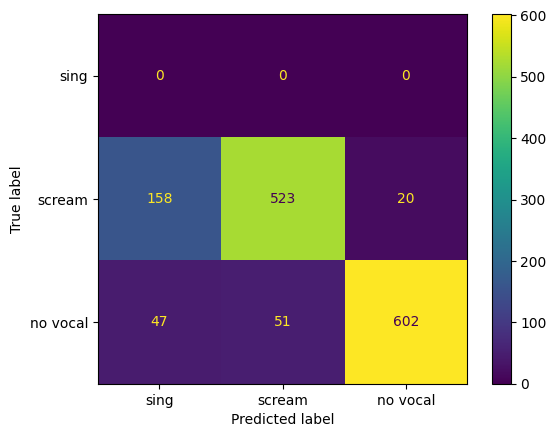

In [29]:
# model=train_models(X_train,y_train_hot,X_test,y_test_hot,epochs=500,batch_size=1024,lr=0.00005,layer1_nodes=256,optimiser='adam',loss='crossentropy',verbose=0)
# print(tf.__version__)
model = keras.models.load_model('../CNN/trained_models/fcnn/fcnn_layer1-256_batch-1024_epochs-500_lr-5e-05')

y_pred=model.predict(X_valid)
y_pred[np.where(y_pred==np.max(y_pred))] = 1

predicted=np.argmax(y_pred, axis=1)
print(len(predicted))
ground_truth=np.argmax(y_valid_hot, axis=1)
print(len(ground_truth))


cm=confusion_matrix(ground_truth,predicted)
score=precision_score(ground_truth,predicted, average='macro')
acc = accuracy_score(ground_truth,predicted)


print(f"Overall Accuracy Score: {acc}")
print("Class-wise accuracy:")
for row in cm:
    print(row/row.sum())
print(f"Macro Accuracy: {score}")

print("Confusion Matrix:")
# print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['sing','scream','no vocal']).plot()
classification_report(ground_truth,predicted)


In [9]:
print("precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         0\n           1       0.90      0.73      0.81       137\n           2       0.96      0.84      0.90       144\n\n    accuracy                           0.79       281\n   macro avg       0.62      0.52      0.57       281\nweighted avg       0.93      0.79      0.85       281\n'")

precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.90      0.73      0.81       137
           2       0.96      0.84      0.90       144

    accuracy                           0.79       281
   macro avg       0.62      0.52      0.57       281
weighted avg       0.93      0.79      0.85       281
'
